In [1]:
# Load Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("/kaggle/input/persib-20202021/Liga120192021.csv")
df

,Pass1,Pass2,Pass3,Pass4,Pass5,Pass6,Pass7,Pass8,Pass9,Pass10
0,11,24,2,20,10,11,13,11,16,71
1,10,11,13,11,20,12,13,20,77,71
2,16,8,16,17,21,22,3,20,10,13
3,22,16,8,16,2,17,23,8,82,4
4,20,12,16,8,16,17,21,23,22,13
...,...,...,...,...,...,...,...,...,...,...
98,53,77,10,66,10,55,66,55,11,10
99,30,22,23,22,74,23,12,23,13,7
100,25,27,74,93,27,11,93,74,27,25
101,27,7,27,7,25,12,27,13,21,7


In [3]:
# Membuat function untuk membuat model KMeans
def createModelBy2Column(index):
    #Mengambil 2 column berdasarkan index
    new_df = df[['Pass{0}'.format(index), 'Pass{0}'.format(index+1)]]
    scaler = StandardScaler()
    scaler.fit(new_df)
    df_scaled = scaler.transform(new_df)
    df_scaled = pd.DataFrame(df_scaled)
    
    # Membuat Prediksi menggunakan K-Means
    km = KMeans(n_clusters=2)
    y_predicted = km.fit_predict(df_scaled)
    
    # Mengatur ulang Columns
    new_df.loc[:, "Cluster"] = y_predicted
    new_df.loc[:, "Perpindahan"] = 'Pemain {0} - Pemain {1}'.format(index, index+1)
    new_df.loc[:, "Passer"] = new_df['Pass{0}'.format(index)]
    new_df.loc[:, "Receiver"] = new_df['Pass{0}'.format(index+1)]
    new_df.drop(['Pass{0}'.format(index),'Pass{0}'.format(index+1)], axis=1)
    return new_df

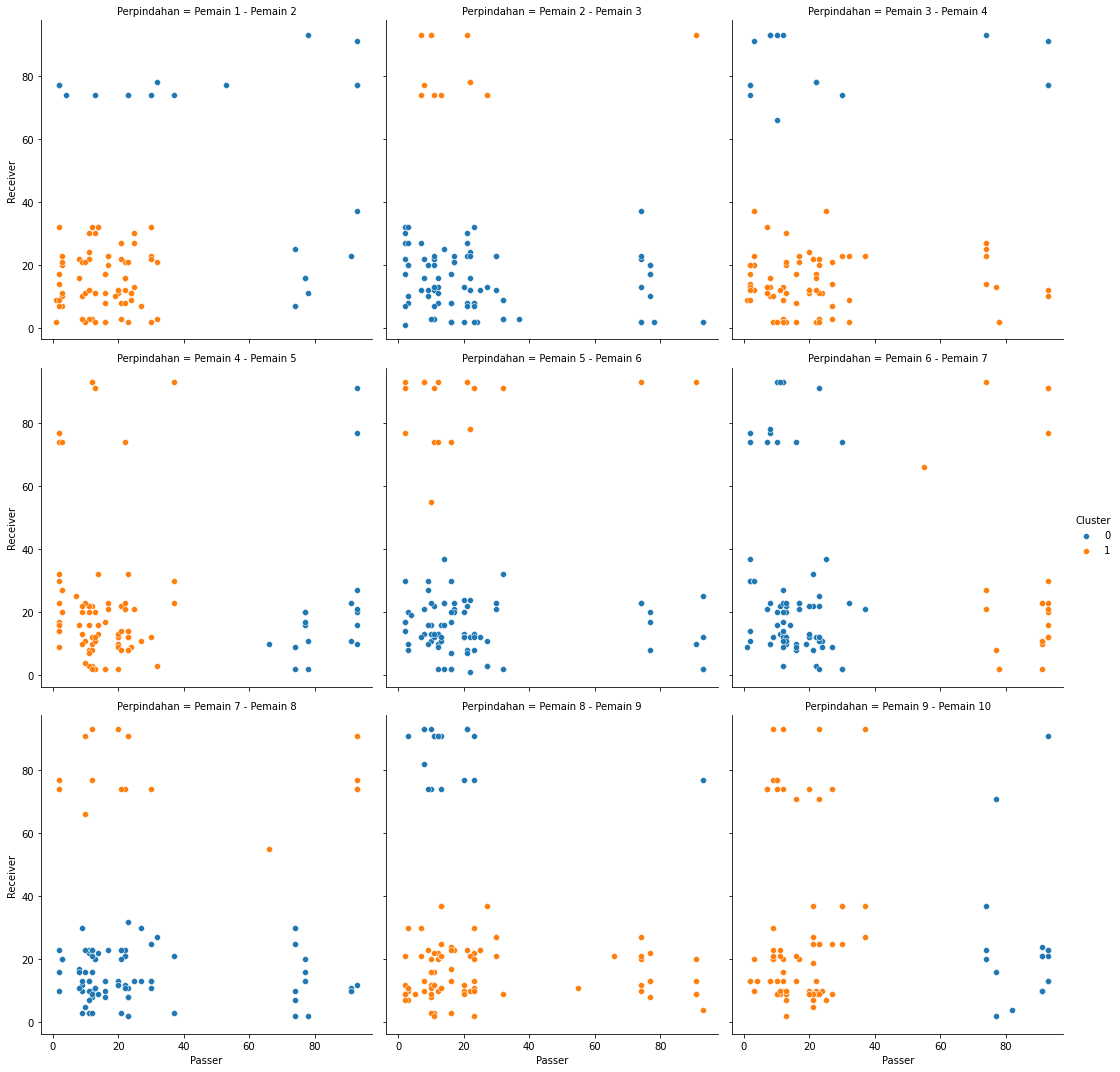

In [4]:
results = None

# Menggabungkan hasil prediksi
for key in range(len(df.columns) -1):
    index = key + 1
    result = createModelBy2Column(index)
    if results is None:
        results = result
    else:
        results = pd.concat([results, result])

# Menampilkan Scatter Plot
g = sns.FacetGrid(results, col="Perpindahan", hue = "Cluster", height=5, col_wrap=3,)
g.map(sns.scatterplot, "Passer", "Receiver")
g.add_legend()